## Worksheet 2

### This is the second set of exercises for the Open Quantum Systems course. As before, there are both analytical and numerical components to the exercises. Each of the 8 questions below is worth 4 marks. 

---

## 1. 
Hamiltonian dynamics for mixed states (in the Schrödinger picture) is described by the von Neumann equation 

$$\frac{{\rm d}\hat{\rho}}{{\rm d}t} = \frac{1}{{\rm i}\hbar}[\hat{H},\hat{\rho}].$$

Suppose that the Hamiltonian comprises a sum of two terms, $\hat{H} = \hat{H}_0 + \hat{H}_1$. The density matrix in the interaction picture generated by $\hat{H}_0$ is defined by

$$ \hat{\rho}_I(t) = \hat{U}^\dagger_0(t,t_0) \hat{\rho}(t) \hat{U}_0(t,t_0),$$

where $\hat{U}_0(t,t_0) = {\rm e}^{-{\rm i}\hat{H}_0 (t-t_0)/\hbar}$, $\hat{\rho}(t)$ is the density matrix in the Schrödinger picture, and $t_0$ is an (arbitrary) initial time. Show that the state in the interaction picture obeys a differential equation of the form

$$ \frac{{\rm d}\hat{\rho}_I}{{\rm d}t} = \frac{1}{{\rm i}\hbar} [\hat{H}_I(t), \hat{\rho}_I(t)],$$

and give an explicit expression for the interaction-picture Hamiltonian $\hat{H}_I(t)$. What is the general solution of this equation in terms of the initial condition $\hat{\rho}(t_0)$?

## 2.
A thermal equilibrium state is a mixed state with two key properties: <br>
    (i) it is stationary (unchanging) under Hamiltonian dynamics and <br>
    (ii) the probability $p_i$ of finding the system with energy $E_i$ is given by the Boltzmann distribution of statistical mechanics, i.e. $p_i = {\rm e}^{-\beta E_i}/Z$, where $\beta = 1/k_BT$ is the inverse temperature and $Z = \sum_i {\rm e}^{-\beta E_i}$ is the partition function.<br>

In quantum mechanics, the thermal state of a system whose dynamics are governed by the Hamiltonian $\hat{H}$ is given by

$$\hat{\rho}_\beta = \frac{{\rm e}^{-\beta \hat{H}}}{Z}, $$

where $Z = {\rm tr}[{\rm e}^{-\beta \hat{H}}]$.

(a) Show that this state obeys both properties (i) and (ii).    

(b) For a qubit with Hamiltonian $\hat{H} = \tfrac{1}{2}\hbar\omega \hat{\sigma}_z$, show that

$$ \hat{\rho}_\beta = \frac{1}{2}\left[\hat{\mathbb{1}} - \tanh(\beta\hbar\omega/2) \hat{\sigma}_z\right].$$

(Hint: take a look at Exercise 1(a), Worksheet 1)

(c) Find analytical expressions for the expectation values of the three Pauli matrices in the above thermal equilibrium state. Plot the thermal expectation value of $\langle \hat{\sigma}_z\rangle$ as a function of dimensionless temperature, $k_B T/\hbar\omega$.

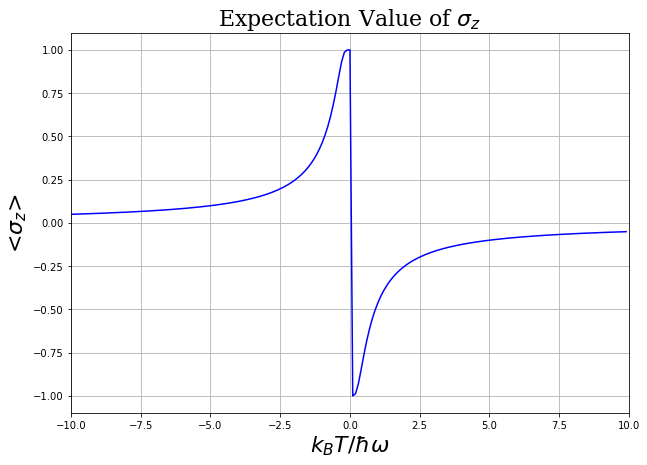

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
from random import random
import json

font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 22,
    }

def plot_expectation_value(x,y,ylabel,xlabel = '$\omega$t',fig_size=(10.0,7.0),plot_grid=True,x_range=[-10,10],colour='b'):
    plt.figure(figsize = fig_size)
    plt.plot(x,y,colour)
    plt.xlim(x_range)
    plt.grid(plot_grid)
    plt.xlabel(xlabel, fontdict=font)
    plt.ylabel('<'+ylabel+'>', fontdict=font)
    plt.title(f'Expectation Value of {ylabel}',fontdict=font)
    plt.show()

   
x=list(np.arange(-10,10,0.1))
y=[-np.tanh(0.5*(i**-1)) for i in x]

plot_expectation_value(x,y, ylabel='$\sigma_z$',xlabel='$k_B T/\hbar\omega$')

## 3. 
The following function samples a "biased coin", which gives the result 0 (heads) with probability p and gives the result 1 (tails) with probability 1-p. Play around with it and try to understand how it works.

In [8]:
def biased_coin(p):
    r = random()
    if r<p:
        return 0
    else:
        return 1

(a) Plot a histogram of 200 realisations of the output of biased_coin() for p=0.3. (Hint: check out the [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function).

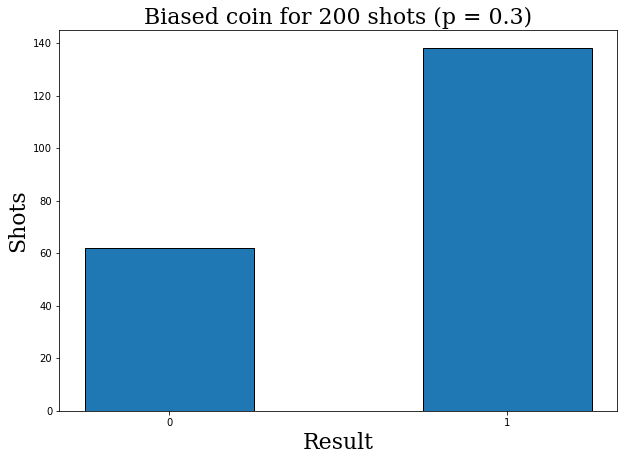

In [11]:
# run the results for 200 runs for p = 0.3
results = [biased_coin(p=0.3) for i in range(200)]

#plot the results in histogram
plt.figure(figsize=(10.0,7.0))
plt.hist(results, bins=[-.25,.25,.75,1.25], ec="k" )
plt.xticks((0,1))
plt.xlabel('Result', fontdict=font)
plt.ylabel('Shots', fontdict=font)
plt.title(f'Biased coin for {shots} shots (p = {p})', fontdict=font)

plt.show()

(b) Write an analogous function that samples a "three-sided coin", which yields the result 0 with probability $p_0$, 1 with probability $p_1$, and 2 with probability $1-p_0-p_1$. Plot a histogram of 200 samples of the output  for $p_0=0.2$ and $p_1 = 0.5$.

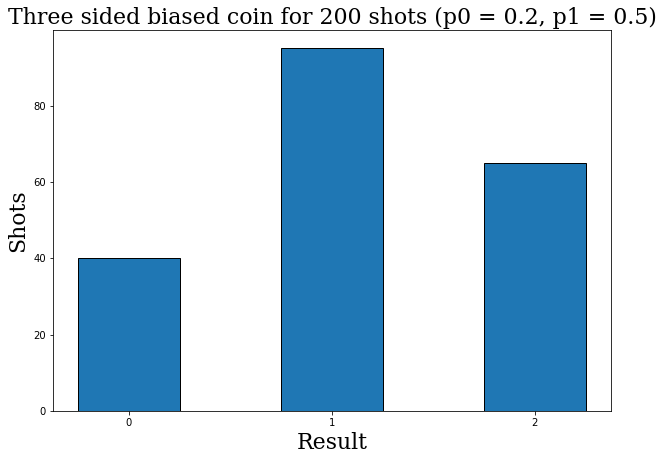

In [13]:

def biased_three_sided_coin(p0,p1):
    r = random()
    if r<p0:
        return 0
    elif r<p0+p1:
        return 1
    else:
        return 2
    

shots = 200
p0 = 0.2
p1 = 0.5
#prob_dict = {'p0' : 0.2, 'p1' : 0.5}


# run the results for 200 runs for p = 0.3
results = [biased_three_sided_coin(p0,p1) for i in range(shots)]

#plot the results in histogram
plt.figure(figsize=(10.0,7.0))
plt.hist(results, bins=[-.25,.25,.75,1.25,1.75,2.25], ec="k" )
plt.xticks(range(3))
plt.xlabel('Result', fontdict=font)
plt.ylabel('Shots', fontdict=font)
plt.title(f'Three sided biased coin for {shots} shots (p0 = {p0}, p1 = {p1})', fontdict=font)
plt.show()

(c) Generalise the function to an "$N$-sided coin", which yields the result $i \in \{0,1,2,\ldots,N-1\}$ with probability $p_i$. Provide a histogram demonstrating that the function works as expected.

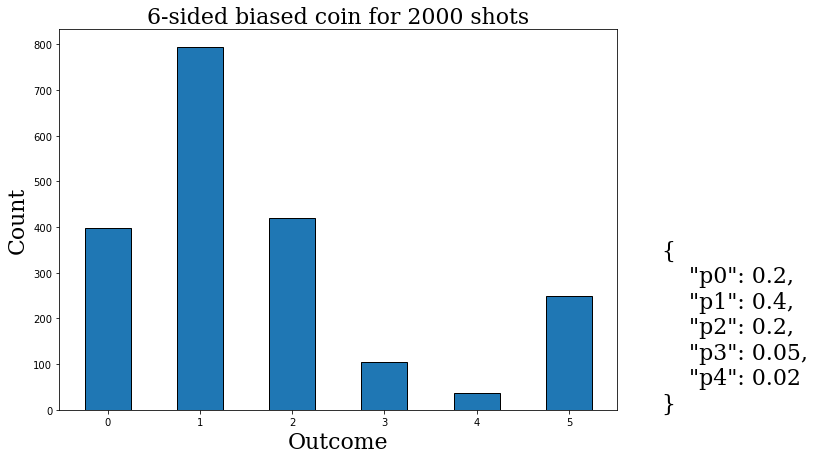

In [16]:
def biased_n_sided_coin(prob_dict):
    '''function for n-sided coin output'''
    r = random()
    n = len(prob_dict)
    p = 0
    for i in range(n):
        p += list(prob_dict.values())[i]
        if r<p:
            return i
    return (n)

def plot_n_sided_coin_hist(prob_dict, fig_size=(10.0,7.0),shots = 200):
    '''plotting function for n-sided coin distribution'''
    results = [biased_n_sided_coin(prob_dict) for i in range(shots)]
    plt.figure(figsize=(10.0,7.0))
    n = len(prob_dict)
    plt.hist(results, bins=np.arange(-.25,n+0.75,0.5), ec="k" )
    plt.xticks(range(n+1))
    plt.xlabel('Outcome', fontdict=font)
    plt.ylabel('Count', fontdict=font)
    dict1 = json.dumps(prob_dict, indent=4, sort_keys=True)
    plt.text(n+1, .75, dict1, fontdict=font)
    plt.title(f'{n+1}-sided biased coin for {shots} shots', fontdict=font)
    plt.show()


plot_n_sided_coin_hist(prob_dict= {'p0' : 0.2, 'p1' : 0.4, 'p2' : 0.2, 'p3' : 0.05, 'p4' : 0.02},shots = 2000)

(d) Can you generalise this to sample from a continuous probability distribution? Write a function that outputs a random number $x$ in the interval $x\in [0,1]$ according to the probability density $$ p(x) = \frac{\pi}{2} \sin(\pi x).$$ Demonstrate your function with a histogram.

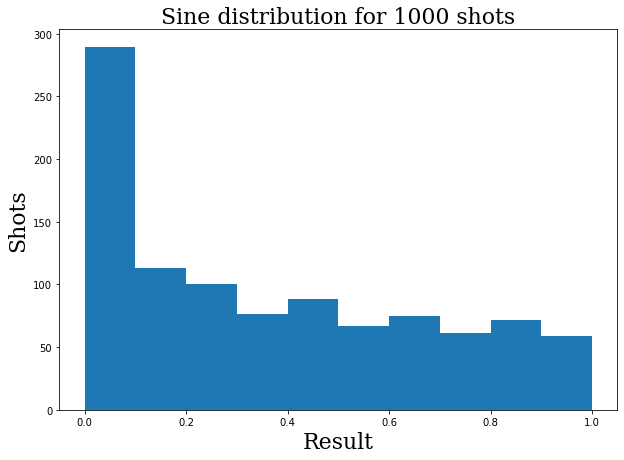

In [18]:



#def sine_distribution(x,dx):
#    
#    return (np.cos(x*np.pi/2) - np.cos((x+dx)*np.pi/2))
#shots = 10000
#x= np.arange(0,1,0.01)
#sine_distribution(0.,1)
#results = [sine_distribution(i,0.01) for i in x]
#results = [sine_distribution() for i in range(10000)]
#plt.hist(results)
#plt.plot(range(shots),[1-np.cos(i*np.pi/2) for i in range(shots)])
def sine_dist():
    r = random()
    return 1-np.cos(r*np.pi/2)
shots  = 1000
results = [sine_dist() for i in range(shots)]
plt.figure(figsize=(10.0,7.0))
plt.hist(results)
#plt.figure(figsize=(10.0,7.0))
plt.title(f'Sine distribution for {shots} shots', fontdict=font)
plt.xlabel('Result', fontdict=font)
plt.ylabel('Shots', fontdict=font)
plt.show()
    

## 4.
In this exercise we will compare the thermal state of a qubit
$$ \hat{\rho}_\beta = \frac{{\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2}}{Z},$$
to the pure state
$$|\psi_\beta\rangle = \frac{1}{\sqrt{Z}}\left({\rm e}^{-\beta\hbar\omega/4}|0\rangle + {\rm e}^{\beta\hbar\omega/4}|1\rangle\right), $$
where $Z = {\rm tr}({\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2})$.

(a) Write down general expressions for the density matrices corresponding to both of the above states.

Similarly to $\hat{\sigma}_x$, The expectation value of $\hat{\sigma}_y$ is zero for the thermal state. As there are no off-diagonal (coherence) terms in the init density matrix).
It does not change, and the probabilities are 50/50. We have no info on the state evolution over time.

For the pure state, we have fluctuations over time. This is due to the presence of the coherences.

## 5. 
Consider the following simple decoherence model for a qubit. The Hamiltonian is 
$$ \hat{H} = \frac{\hbar\omega}{2} \hat{\sigma}_z,$$
where $\omega$ is a random variable that takes the values $\omega \in \{+\omega_0,-\omega_0\}$ with equal probabilities $p_+ = p_- = \tfrac{1}{2}$.

(a) Write down an analytical expression for the time-dependent density matrix describing the ensemble, starting from the initial condition $\hat{\rho}(0) = |+\rangle\langle +|$.

(b) The purity $P$ is defined by $P={\rm tr} \hat{\rho}^2$. It is a real number that varies between $P=1$ for a pure state and $P = 1/2$ for a maximally mixed state of a qubit. (More generally, $P$ varies between $1$ and $1/d$ for a system with Hilbert-space dimension $d$.) Plot the purity of the qubit density matrix as a function of time in the interval $\omega_0 t = [0,10]$. Comment briefly on what happens at $t = \pi/2\omega_0 $, $t = \pi/\omega_0 $, and $t=2\pi/\omega_0$.

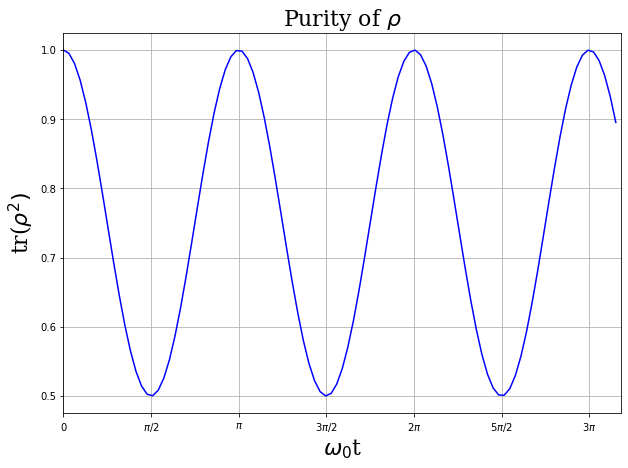

In [7]:


font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 22,
    }

def plot_density_purity(x,y,ylabel='$\\rho$',xlabel = '$\omega_0$t',fig_size=(10.0,7.0),plot_grid=True,x_range=[0,10],colour='b'):
    plt.figure(figsize = fig_size)
    plt.plot(x,y,colour)
    plt.xlim(x_range)
    plt.grid(plot_grid)
    labels = ['$0$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$', r'$5\pi/2$', r'$3\pi$']
    plt.xticks(ticks = np.arange(0, 3*np.pi+0.01, np.pi/2), labels = labels)
    plt.xlabel(xlabel, fontdict=font)
    plt.ylabel('tr($\\rho^2)$', fontdict=font)
    
    plt.title(f'Purity of {ylabel}',fontdict=font)

   
x=list(np.arange(0,10,0.1))
y=[0.5*(1+np.cos(i)**2) for i in x]
plot_density_purity(x,y)

at $t = \pi/2\omega_0 $, the purity is minimized at 0.5, resulting in a maximally mixed state.

At $t = \pi/\omega_0 $, and $t=2\pi/\omega_0$, the purity is maximised at 1.0, resulting in a pure state.

## 6. 
Now consider a qubit decoherence model, $\hat{H} = \hbar\omega\hat{\sigma}_z/2$, where the qubit transition frequency is a Gaussian random variable specified by the expectations
$$ \mathbb{E}[\omega] = \omega_0,\qquad \mathbb{E}[(\omega-\omega_0)^2] = g^2.$$

(a) Consider the evolution starting from the initial state $\hat{\rho}(0) = |+\rangle\langle +|$. Simulate $M=20$ random realisations of the qubit dynamics up to a time $\omega_0 t = 30$, with $g = 0.1\omega_0$. Plot the expectation value $\langle \hat{\sigma}_x\rangle$ as a function of time for each realisation (put them all on one plot). 

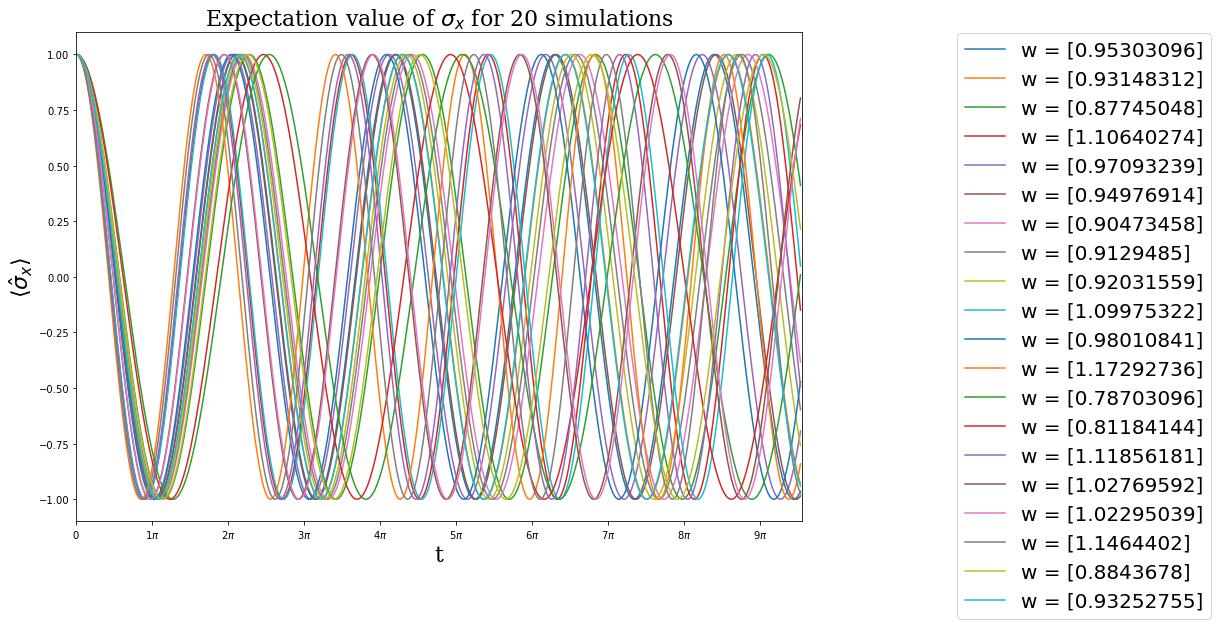

In [7]:

from scipy.linalg import expm
X = np.array([[0,1],[1,0]])
Y = np.array([[0,0-1j],[0+1j,0]])
Z = np.array([[1,0],[0,-1]])
UP = np.array([[1],[0]])
DOWN = np.array([[0],[1]])
PLUS = 1/np.sqrt(2)*(UP+DOWN)
sigma = np.array([[X],[Y],[Z]])
I = np.array([[1,0],[0,1]])

w = 1
g = 0.1*w
W = np.random.normal(w, g, 100)

max_wt = 30
interval = 0.05
wt = np.arange(0,max_wt,interval)


def time_evolution_operator(matrix,time_interval,const=1):
    '''return the time evolution operator for a given time interval and matrix'''
    return(expm(-1j*const*time_interval*matrix))
        
def hamilton_matrix(u=[0,0,1],hw=0.2):
    ''' utility function to output 2x2 Hamiltonian'''
    sigma_x = u[0]*X
    sigma_y = u[1]*Y
    sigma_z = u[2]*Z
    return (hw/2)*(sigma_x+sigma_y+sigma_z)

states = []
states.append(PLUS)

## define my expectation function
def expectation_value(operator,state):
    ''' returns the expectation value for a given state and operator'''
    result = operator.T.conj() @ state @ operator
    return float(result[0,0].real)

def expectation_value_temporal(max_time, states, state,time_operator,time_interval = 0.05):
    ''' returns the expectation value per discrete time window for a given state and operator'''
    max_bucket = int(max_time/time_interval)
    # set up my empty results table 
    results = np.zeros((max_bucket,len(states)))
    # enumerate my states into a dict so i can update in a loop
    init_state_dict = dict(enumerate(states))
    # loop over each time window and initial state
    for i in range(max_bucket):
        for j in range(len(init_state_dict)):
            results[i,j] = expectation_value(init_state_dict[j],state.real)
            #time_operator = time_evolution_operator(hamilton_matrix,hw=1),interval)
            init_state_dict[j] = time_operator @ init_state_dict[j]
    # return the output
    return results

def plot_expectation_value(x,y,ylabel,xlabel = '$\omega$t',fig_size=(10.0,7.0),plot_grid=True,x_range=[0,8*np.pi],colour='b'):
    plt.figure(figsize = fig_size)
    plt.plot(x,y,colour)
    plt.xlim(x_range)
    plt.grid(plot_grid)
    plt.xlabel(xlabel, fontdict=font)
    plt.ylabel('<'+ylabel+'>', fontdict=font)
    plt.title(f'Expectation Value of {ylabel}',fontdict=font)


def gaussian_expectation_temporal(observable):
    w = np.random.choice(W,1)
    w_list.append(w)
    U_t = time_evolution_operator(hamilton_matrix(hw = w),0.05)
    return expectation_value_temporal(max_wt, states, observable,U_t)

def plot_gaussian_expectation(n,results,observable):
    #res = [gaussian_expectation_temporal(observable) for i in range(n)]
    #print(len(results))
    plt.figure(figsize = (13.0,9.0))
    for i in range(n):
        plt.plot(wt,results[i],label = 'w = '+str(w_list[i]))
    plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.4),fontsize=20)
    labels = [r'$'+str(i)+'\pi$' for i in range(1,11)]
    labels.insert(0,'$0$')
    plt.xticks(ticks = np.arange(0, 10*np.pi+0.01, np.pi), labels = labels)
    plt.xlabel('t', fontdict=font)
    plt.xlim([0,30])
    plt.ylabel('$\langle \hat{\sigma}_x\\rangle$', fontdict=font)
    plt.title( f'Expectation value of $\sigma_x$ for {n} simulations', fontdict=font)
    plt.show()
    
w_list = []
n=20
results = [gaussian_expectation_temporal(X) for i in range(n)]
plot_gaussian_expectation(n,results,X) 
#print(len(results))

(b) Plot the sample average of $\langle \hat{\sigma}_x\rangle$ from your simulated trajectories. The sample average is defined as
    $$\overline{\langle \hat{\sigma}_x\rangle}_{\rm samp} = \frac{1}{M} \sum_{m=1}^M \langle \hat{\sigma}_x\rangle_m,$$
    where $\langle \hat{\sigma}_x\rangle_m$ is the result for the $m^{\rm th}$ trajectory. How does this compare to what you expect for a very large number of trajectories $M\to\infty$?

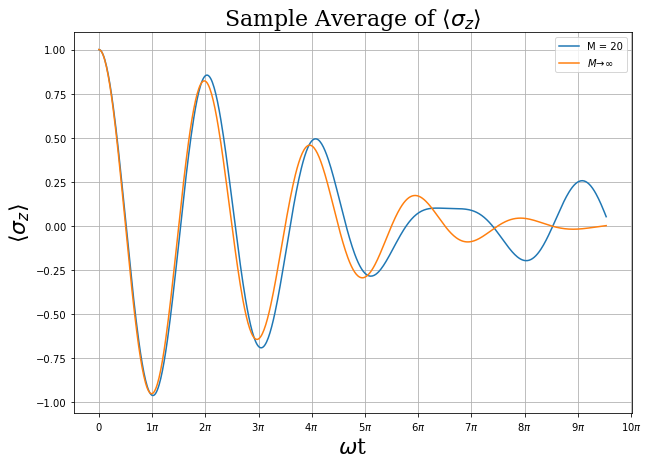

In [9]:

results1 = sum(results[i] for i in range(n))/n


def func(t,g=0.1,w_0=1):
    return np.exp(-(g**2)*(t**2)/2)*np.cos(w_0*t)


y=[func(t=i) for i in wt]
plt.figure(figsize = (10.0,7.0))
plt.plot(wt,results1,label= 'M = 20')
plt.plot(wt,y,label ='$M \\to \infty$' )
plt.grid(True)
labels = [r'$'+str(i)+'\pi$' for i in range(1,11)]
labels.insert(0,'$0$')
plt.xticks(ticks = np.arange(0, 10*np.pi+0.01, np.pi), labels = labels)
plt.xlabel(xlabel = '$\omega$t', fontdict=font)
plt.ylabel('$\langle \sigma_z\\rangle$', fontdict=font)
plt.title(f'Sample Average of $\langle \sigma_z\\rangle$',fontdict=font)
plt.legend()
plt.show()


As M tends to $\infty$, our sample average will correlate to the expected value of sigma_x calculated analytically. The system will decohere due to the off-diagonal terms in our density matrix.

For M=20, we are approximating the expected value and can see our plot loses its shape over time due to inaccuracies in our model compared to the theory.

## 7. 
The amplitude damping channel is a CPTP map for a qubit that describes the loss of energy, e.g. through spontaneous emission. The map is specified by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r} \hat{\sigma}_+\hat{\sigma}_- + \hat{\sigma}_-\hat{\sigma}_+,\qquad \hat{K}_1 = \sqrt{r}\hat{\sigma}_-,$$
where $\hat{\sigma}_\pm = \frac{1}{2}(\hat{\sigma}_x\pm{\rm i}\hat{\sigma}_y)$ are the usual qubit raising and lowering operators. 

(a) Verify that the Kraus operators above constitute a CPTP map.

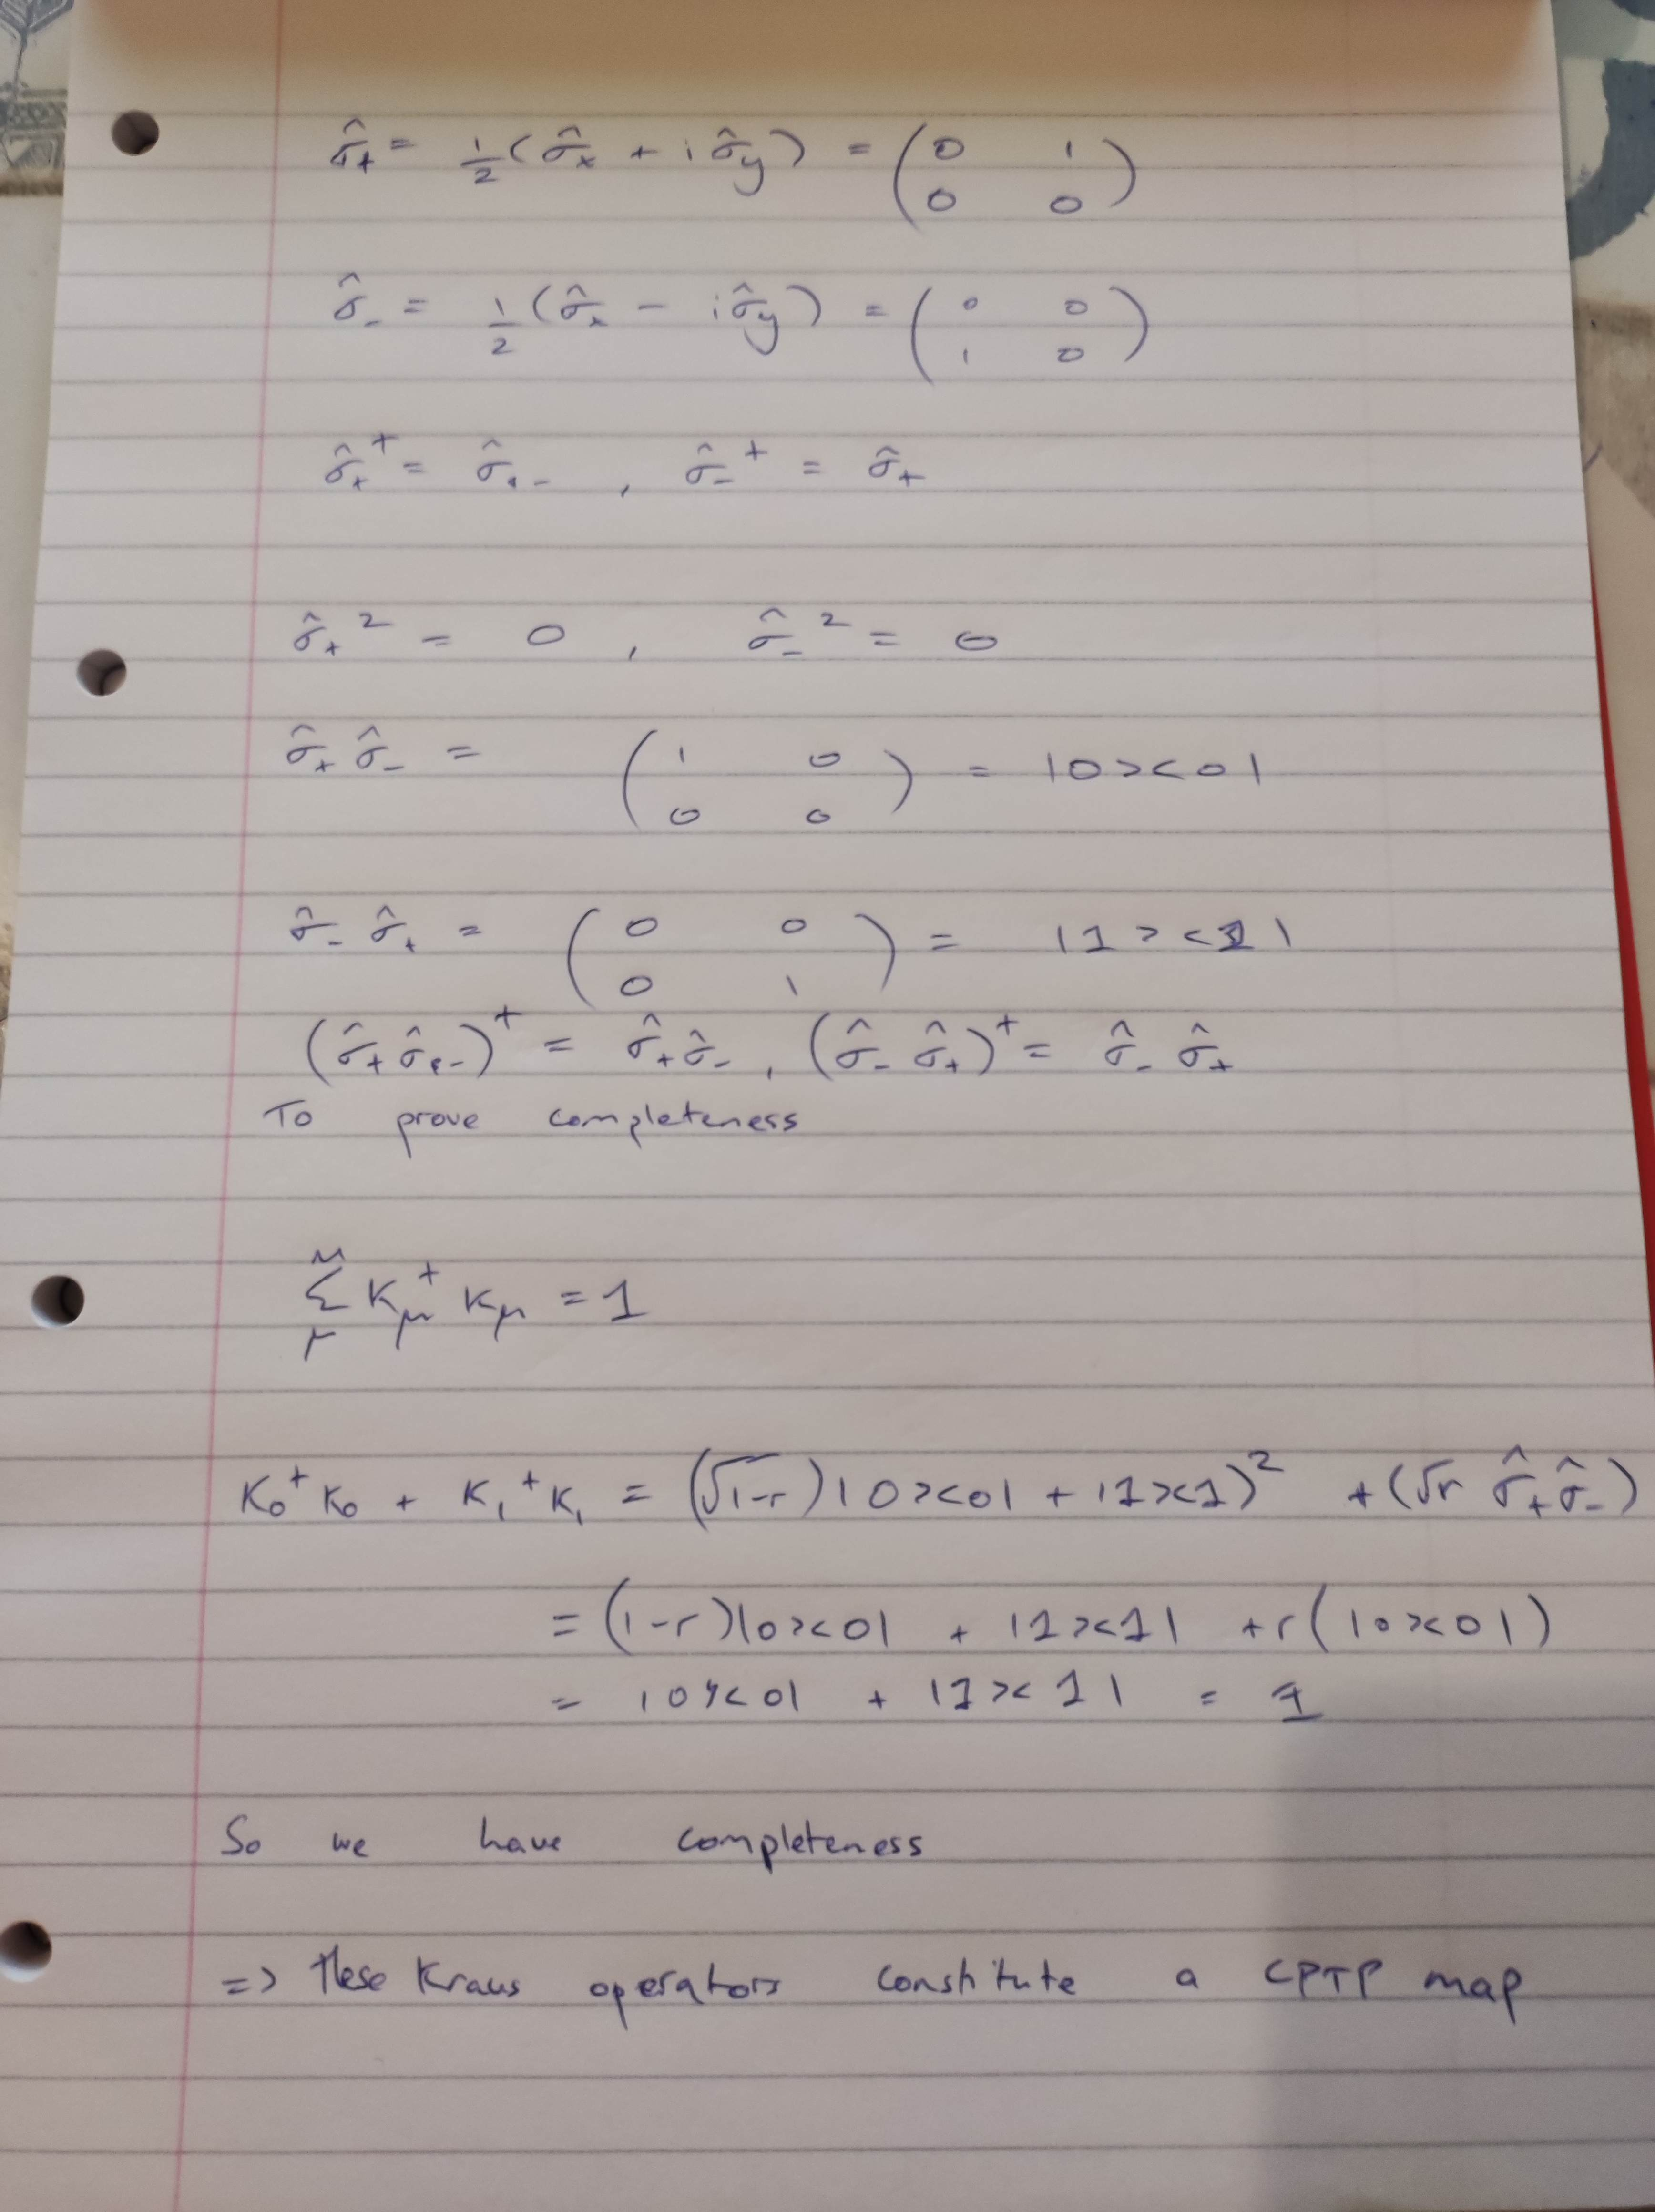

(b) Starting from the superposition state $\hat{\rho} = |+\rangle\langle +|$, with $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, find the density matrix $\mathcal{E}(\hat{\rho})$ (e.g. numerically) and plot the expectation values of the three Pauli operators $\hat{\sigma}_{x,y,z}$ as a function of $r$.

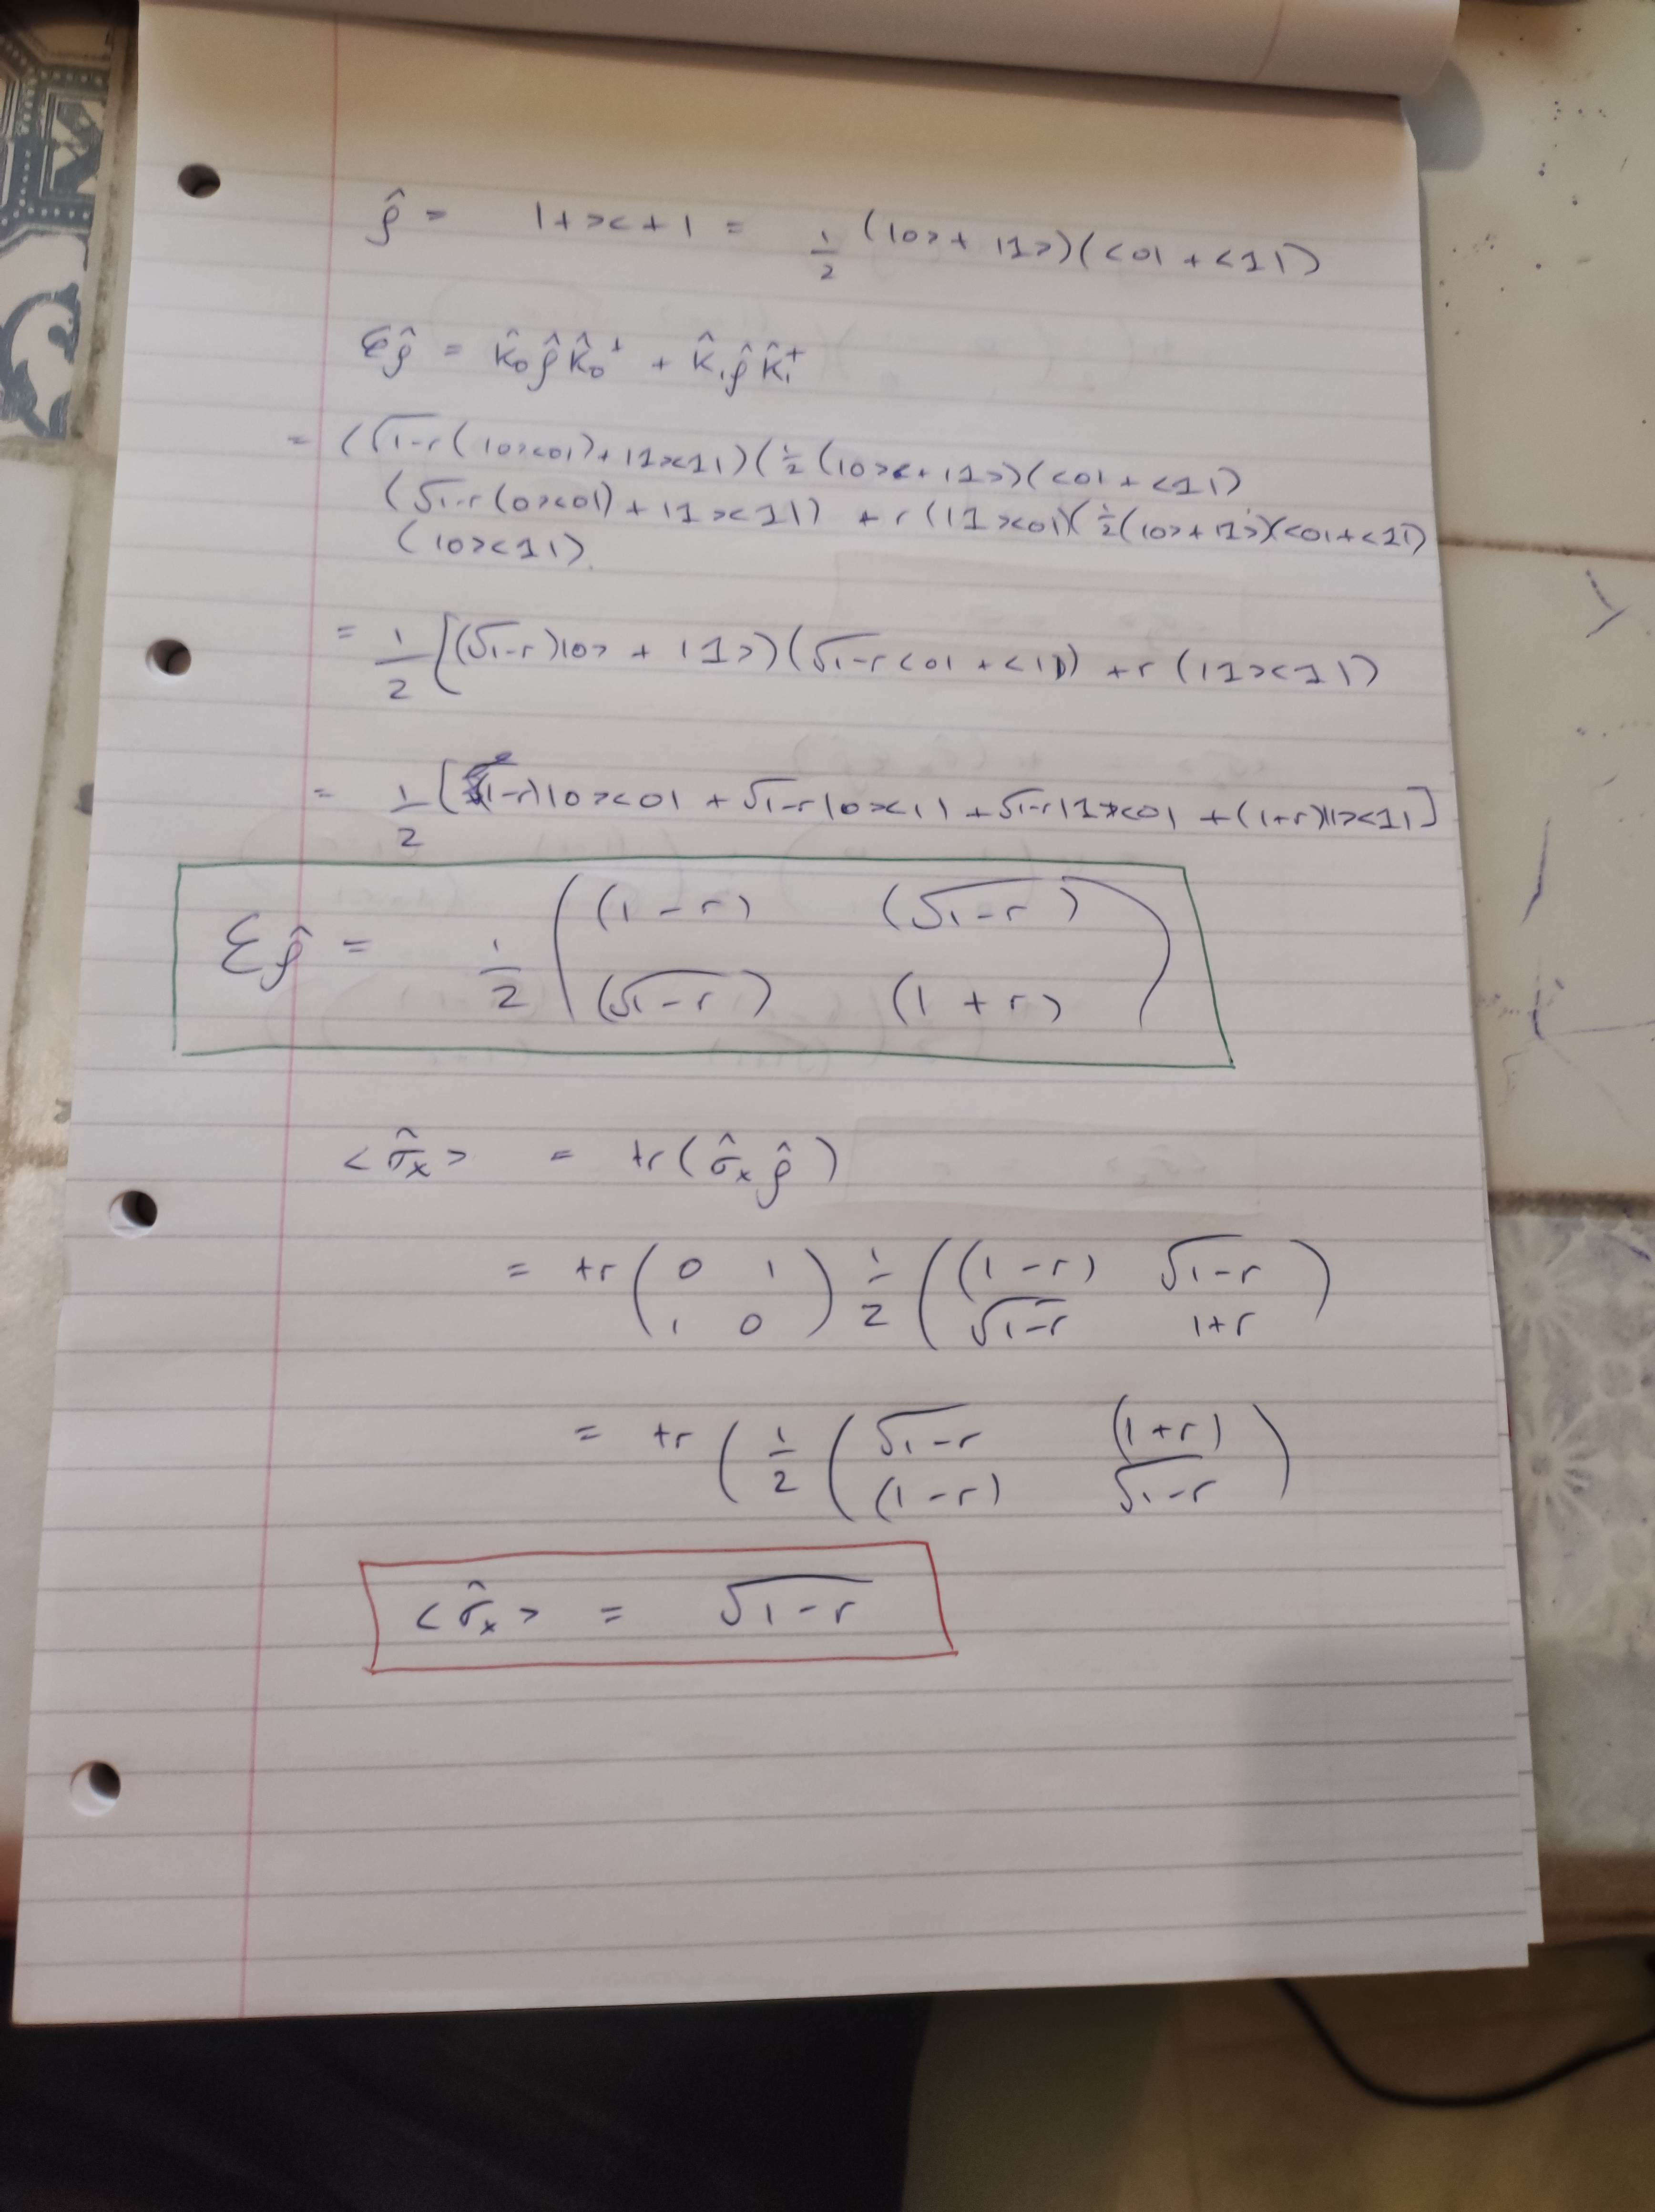

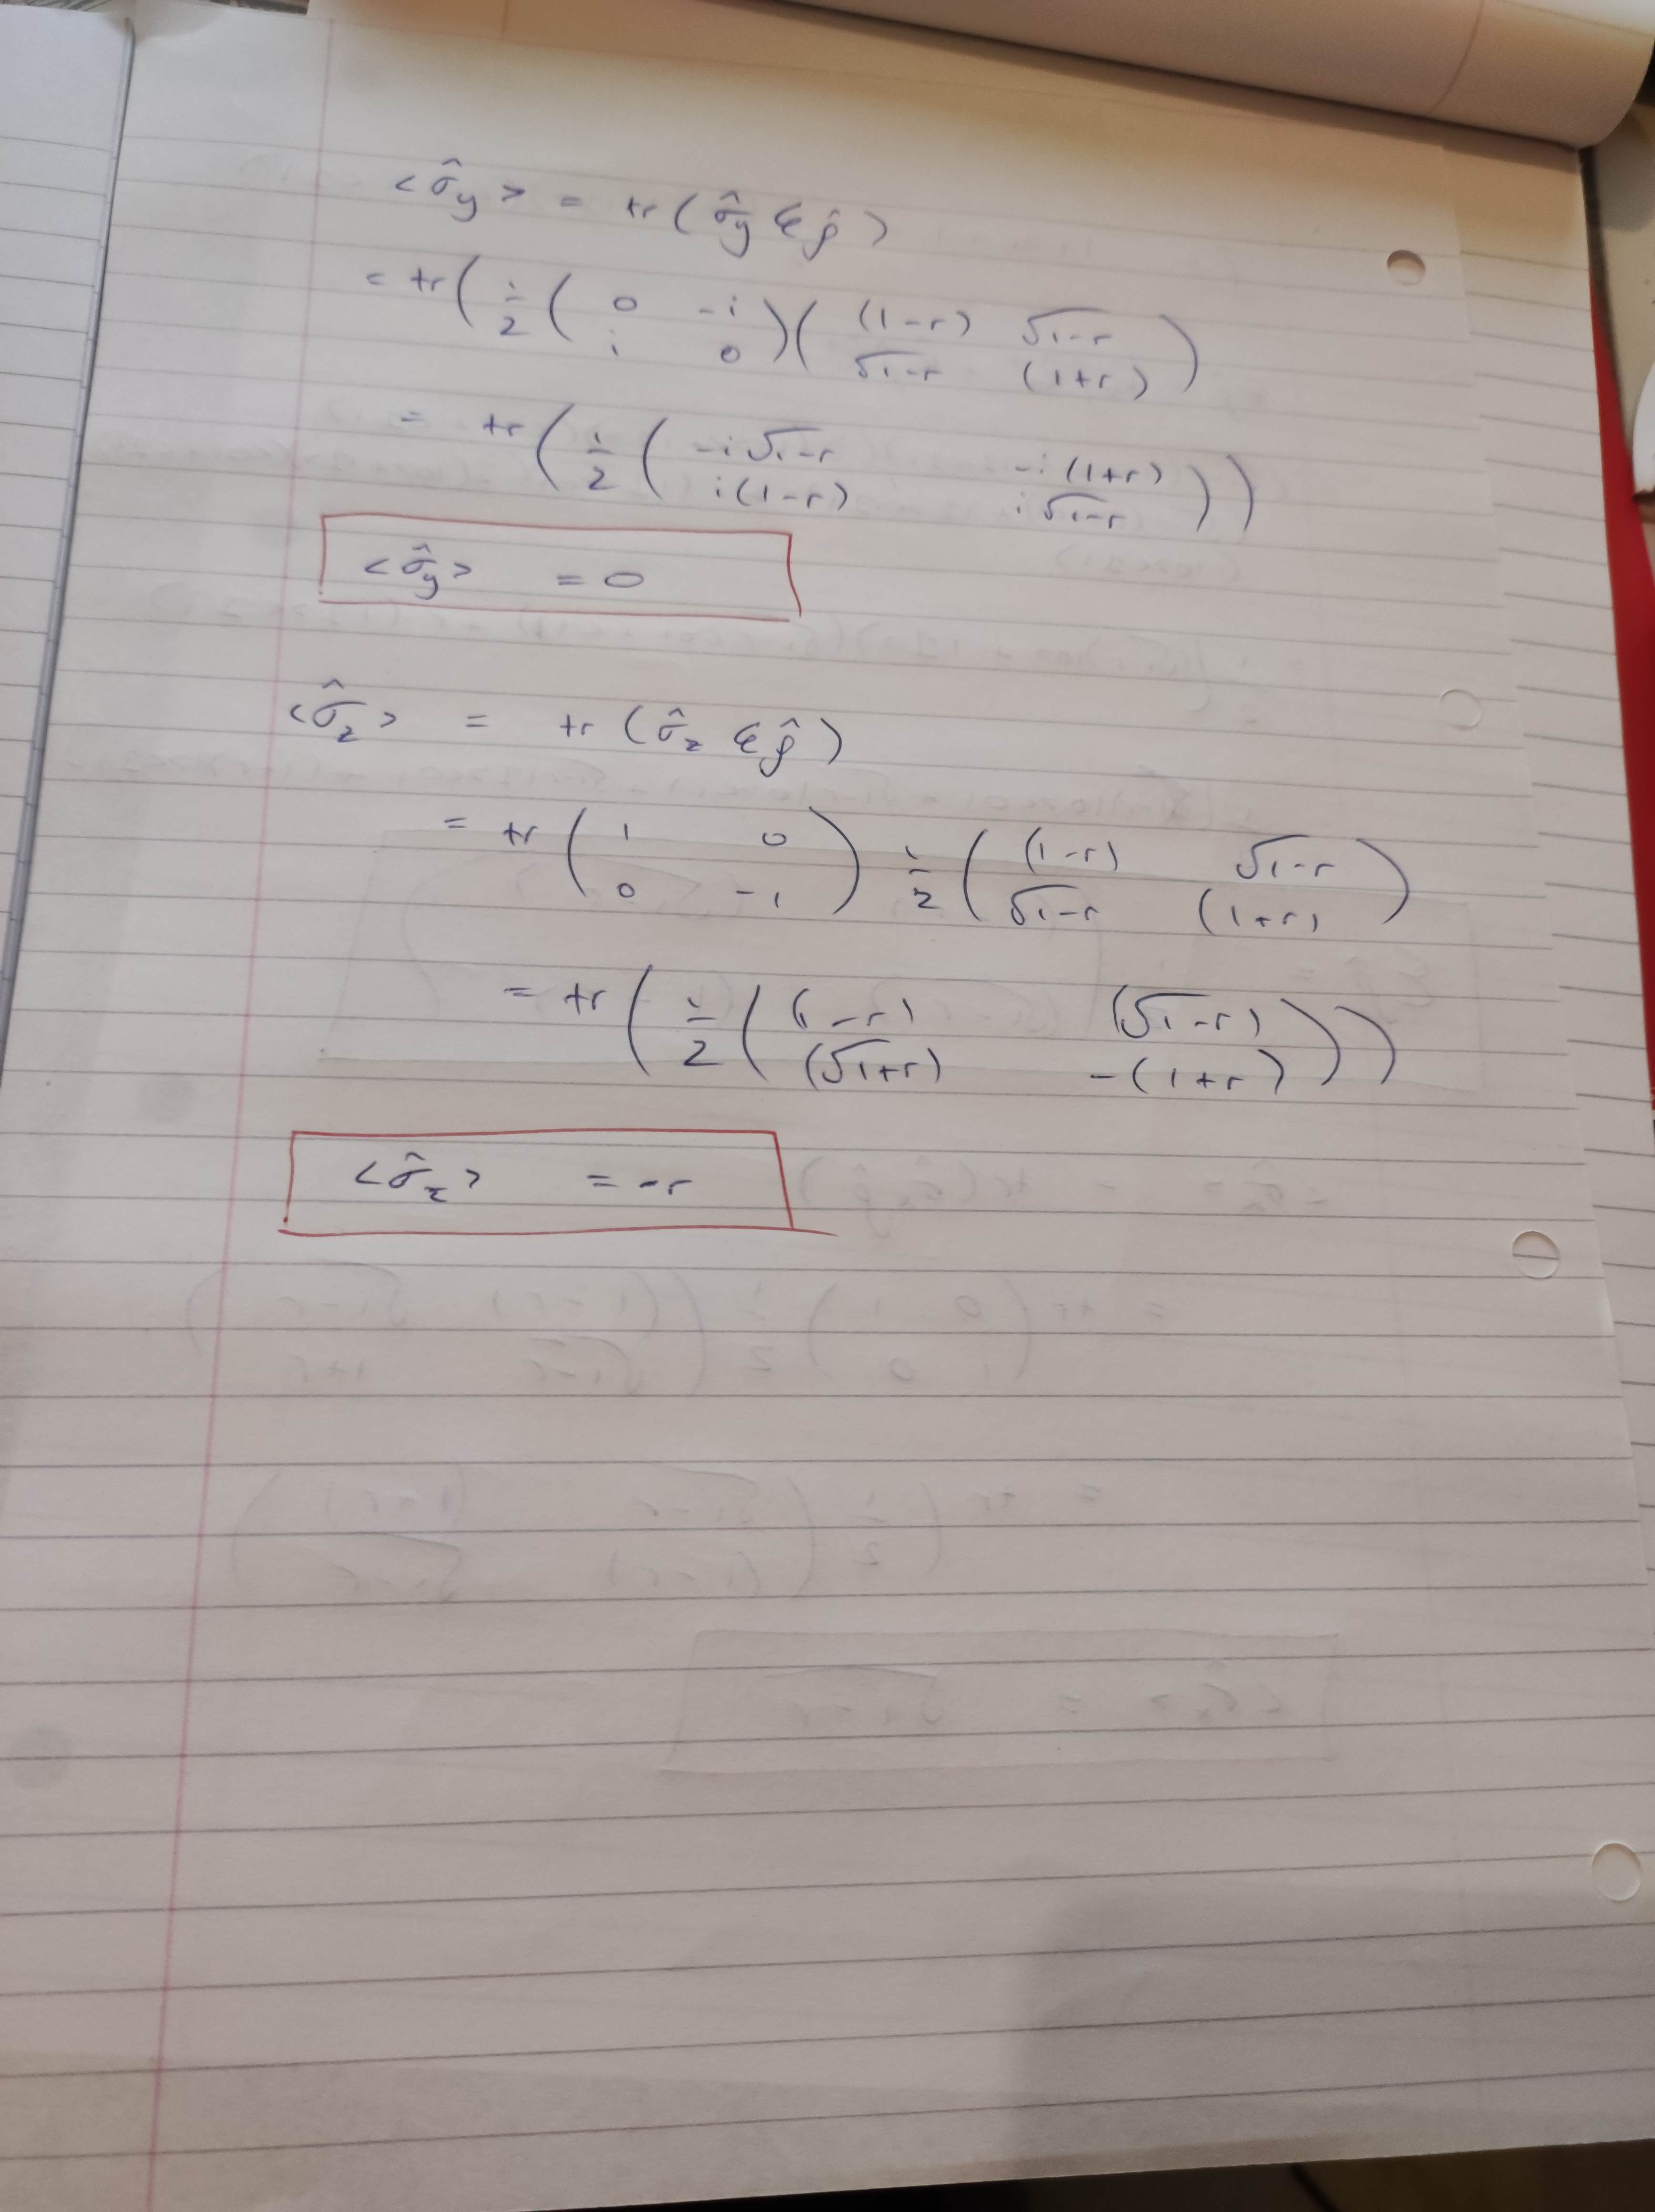

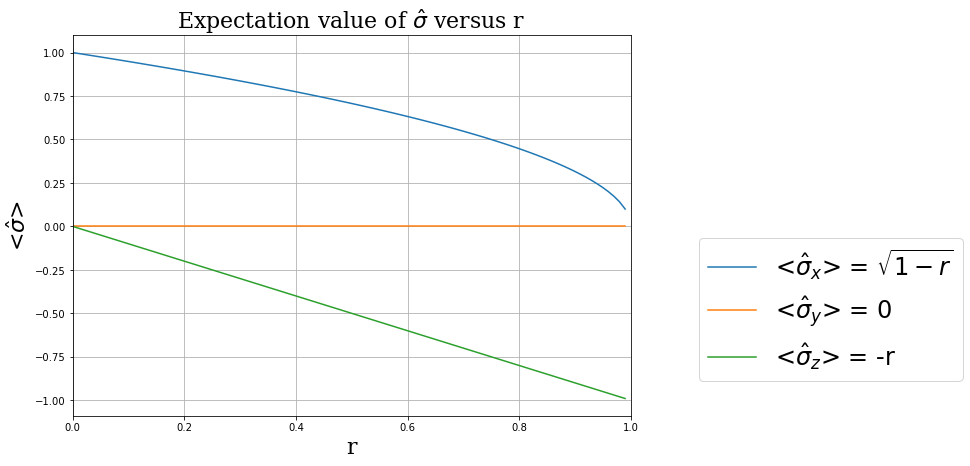

In [10]:

#define a multi plot function for expectation value of the Pauli matrices
def multi_plot_expectation_value(x_data,y_data,fig_size=[10.0,7.0],plot_grid=True,x_range=[0,1]):
    '''return the plot of pauli matrices expected value'''
    plt.figure(figsize = fig_size)
    plt.plot(x_data,y_data.T[0],label = '<$\hat{\sigma}_x$> = $\sqrt{1-r}$')
    plt.plot(x_data,y_data.T[1],label = '<$\hat{\sigma}_y$> = 0')
    plt.plot(x_data,y_data.T[2],label = '<$\hat{\sigma}_z$> = -r')
    plt.xlim(x_range)
    plt.grid(plot_grid)
    plt.legend(fontsize=24,bbox_to_anchor=(1.1, 0.5))
    font["color"] = 'black'
    plt.title('Expectation value of $\hat{\sigma}$ versus r',fontdict=font)
    plt.xlabel('r',fontdict=font)
    plt.ylabel('<$\hat{\sigma}$>',fontdict=font)
    plt.show()

#set my variables
max_r = 1
interval = 0.01
x=list(np.arange(0,max_r,interval))

#initialize my results table
results = np.zeros((3,int(max_r/interval)))

# x results
results[0] = [np.sqrt(1-i) for i in x]

# y results
results[1] = [0 for i in x]
  
# z results
results[2] = [-i for i in x]

# plot the results
multi_plot_expectation_value(x,results.T)


(c) Now let us interpret the above Kraus operators as representing a generalised measurement with two outcomes. Write down analytical expressions for the probabilities of these two outcomes and the corresponding post-measurement states, assuming an arbitrary initial density matrix $\hat{\rho}$. Plot a histogram of the results that might be obtained from 200 such measurements on the state $\hat{\rho} = |+\rangle\langle +|$, assuming that $r=0.5$.

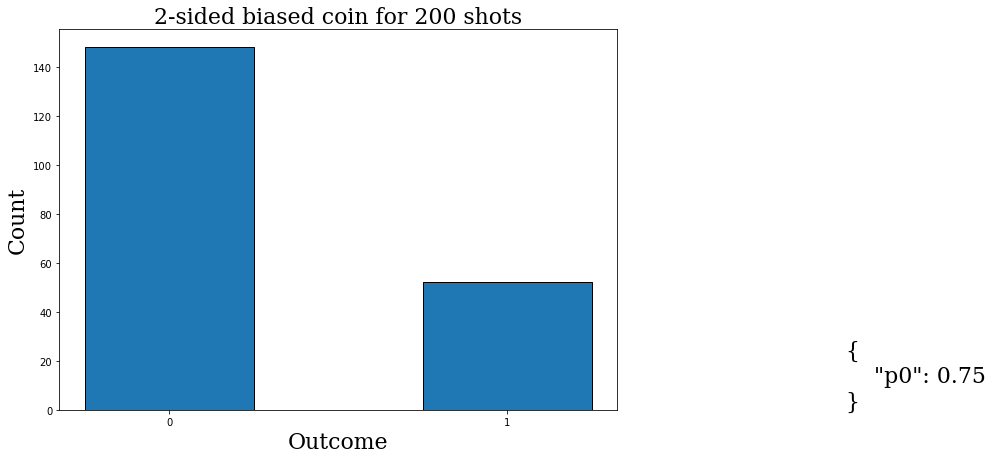

In [11]:
## we have p = 0.5 and r = 0.5
p = r = 0.5

plot_n_sided_coin_hist(prob_dict= {'p0' : 1-p*r}, shots = 200)

(d) Now consider the generalised measurement defined by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r}\hat{\sigma}_+\hat{\sigma}_-, \qquad \hat{K}_1 = \hat{\sigma}_-\hat{\sigma}_+, \qquad \hat{K}_2 = \sqrt{r}\hat{\sigma}_-.$$
As in part (c), give general expressions for the probabilities of each outcome and the corresponding post-measurement state. Simulate the outcome (i.e. plot a histogram) of 200 measurements on the state $\hat{\rho} = |+\rangle\langle +|$. How does this measurement differ from the one in part (c)?

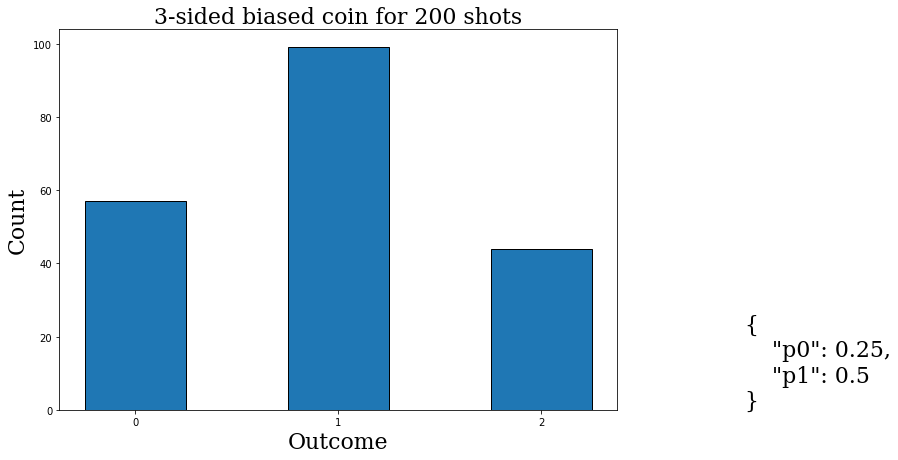

In [12]:
## we have p = 0.5 and r = 0.5, so p0 = 1 - (0.5*0.5)
p = r = 0.5



plot_n_sided_coin_hist(prob_dict= {'p0' : p-p*r, 'p1' : 1-p}, shots = 200)

## 8. 
(a) The partial trace over one qubit of a two-qubit system is defined by

$$ \hat{\rho}_A = {\rm tr}_B ( \hat{\rho}) = \sum_{j=0}^1 \langle b_j| \hat{\rho}|b_j\rangle = \sum_{j=0}^1 (\hat{\mathbb{1}}_A\otimes\langle b_j|) \hat{\rho}(\hat{\mathbb{1}}_A\otimes| b_j\rangle), $$

where $\{|b_j\rangle\}$ is any orthonormal basis in the Hilbert space of qubit $B$. Assume that $|b_{0}\rangle = |0\rangle$ and $|b_1\rangle = |1\rangle$ are the computational basis states. Construct the Kraus operators describing the above CPTP map. Verify numerically that the Kraus operators obey the completeness relation required for a CPTP map.

Checking the completeness via Python too

In [9]:

#define our Kraus operators
K0 = np.kron(I,UP.T)
K1 = np.kron(I,DOWN.T)

#check for completeness
# there are no imaginary parts, so I'm not taking complex conjugate as K0/1.conj = K0/1
print(K0.T@K0+K1.T@K1)

print('\nSo we have completeness')





[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]

So we have completeness


(b) Now consider again the two-qubit problem described by the Hamiltonian

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z,$$

which we saw in question 8 of Worksheet 1. Simulate the dynamics starting from the pure state $|\psi(0)\rangle = |10\rangle$. Use the parameters $\omega_A = \omega_B$ and $J=V = 0.5\omega_A$, and simulate up to a time $Jt = 20$. (You can either re-use your solution from Worksheet 1, or adapt the code from the solution provided.) Compute the reduced density matrix of qubit $A$ and plot its purity, $P = {\rm tr}(\hat{\rho}_A^2)$, as a function of time.

I'll load in all my relevant functions from Worksheet 1 (new and improved !)

In [10]:
# define a function per state
def tensor_loop(num,state):
    r = []
    for i in range(num):
        ops = [I]*num
        ops[i] = state
        res = ops[0]
        for j in range(1,num):
            res = np.kron(res,ops[j])
            if j == (num-1):
                r.append(res)
                
    return(r)

#run the function over each pauli matrix
def pauli_tensor_loop(n):
    return [tensor_loop(n,j) for j in sigma]

def hamiltonian_per_dim(n,V=0.5,J=0.5,w=1):
    '''output my hamiltonian for given dimension'''
    x = tensor_loop(n,X)
    y = tensor_loop(n,Y)
    z = tensor_loop(n,Z)
    # if a default w is provided i.e. a float, lets make it a list
    if not list == type(w):
        w = n*[w]
    part_a = sum(w[i]*z[i] for i in range(n))
    part_b = sum(x[i]@x[i+1]+y[i]@y[i+1] for i in range(n-1))
    part_c = sum(z[i]@z[i+1] for i in range(n-1))
    return (-1/2*part_a)+(0.25*J*part_b)+(V/2*part_c)

def time_evolution_operator(matrix,time_interval,const=1):
    '''return the time evolution operator for a given time interval and matrix'''
    return(expm(-1j*const*time_interval*matrix))

def init_state_per_dim(n):
    '''output my initial state for given dimension'''
    res = DOWN
    for j in range(n-1):
        res = np.kron(res,UP)
    return res

Now I'll load my new functions required for computing density matrices and partial traces

In [15]:
def init_density_per_dim(n):
    '''output my initial density matrix for given dimension'''
    state = init_state_per_dim(n)
    return state@state.T

def partial_trace_temporal(rho,K0=K0,K1=K1):
    '''this function returns my partial trace given initial density matrix and Kraus operators'''
    return (K0@rho@K0.T + K1@rho@K1.T)

def purity_evolution_n_dim(n,interval=0.05,V=0.5,J=0.5,w=1):
    '''output my purity value for given dimension and parameters'''
    #what is my initial density matrix
    rho = init_density_per_dim(n)
    # find my time evolution operator
    U_t = time_evolution_operator(hamiltonian_per_dim(n,V=V,J=J,w=w),interval)
    # find my time-dependent density matrix
    rho = density_matrix_temporal(U_t,rho)
    #find my partial trace
    partial_t = partial_trace_temporal(rho)
    #find my purity
    
    return purity_function(partial_t)

def density_matrix_temporal(unitary,rho):
    '''this returns density matrix for a given unitary and initial state'''
    result = unitary.T.conj() @ rho @ unitary
    return result
    
def purity_function(rho):
    '''This functions returns the purity of a given density matrix'''
    return np.trace(rho@rho).real

def plot_density_purity(x,y,ylabel='$\\rho_a$',xlabel = 'Jt',fig_size=(10.0,7.0),plot_grid=True,x_range=[0,40],colour='b'):
    plt.figure(figsize = fig_size)
    plt.plot(x,y,colour)
    plt.xlim(x_range)
    plt.grid(plot_grid)
    num_pis = int(x_range[1]//np.pi)
    labels = [r'$'+str(i)+'\pi$' for i in range(1,1+num_pis)]
    labels.insert(0,'$0$')
    plt.xticks(ticks = np.arange(0, num_pis*np.pi+0.01, np.pi), labels = labels)
    plt.xlabel(xlabel, fontdict=font)
    plt.ylabel('tr($\\rho_a^2)$', fontdict=font)
    plt.title(f'Purity of A',fontdict=font)
    plt.show()

Now I'll run the code for my given parameters and plot the purity over time

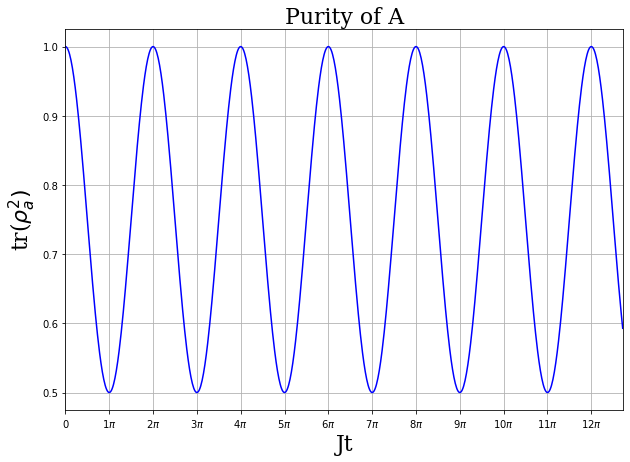

In [16]:
wt = np.arange(0,40,0.05)
results = [purity_evolution_n_dim(2,interval=i,w=1) for i in wt]

plot_density_purity(wt,results)

(c) Repeat the purity calculation of part (b) but with the parameters $\omega_A = 2\omega_B$ and $J=V=0.5\omega_A$. Comment on the differences between the results of (b) and (c).

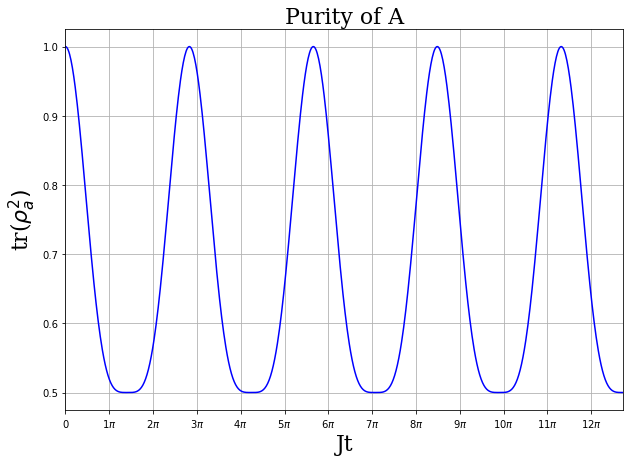

In [17]:
wt = np.arange(0,40,0.05)
results = [purity_evolution_n_dim(2,interval=i,V=0.5,J=0.5,w=[1,0.5]) for i in wt]

plot_density_purity(wt,results)

The purity of A changes when we alter the drive frequency of the B qubit. 

For $\omega_A = 2\omega_B$, the purity of A has a sinusoidal oscillation, so our knowledge of the state of A is fluctuating periodically (with period $2\pi$)

When we increase  $\omega_B$ , the purity of subsystem A hangs in a maximally mixed state (at 0.5) for longer. This is an indication that entanglment is occuring. 